In [156]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [25]:
df_agf = dict()
df_j8e = dict()
df_j8g = dict()
df_uzh = dict()
df_uzr = dict()

df_agf['rep1'] = pd.read_csv("/home/elaine/elaine_data/caver_3.0/analysis_fenestrations/0-250-400-500/6AGF_REP1_bottlenecks.csv")
df_agf['rep2'] = pd.read_csv("/home/elaine/elaine_data/caver_3.0/analysis_fenestrations/0-250-400-500/6AGF_REP2_bottlenecks.csv")
df_agf['rep3'] = pd.read_csv("/home/elaine/elaine_data/caver_3.0/analysis_fenestrations/0-250-400-500/6AGF_REP3_bottlenecks.csv")

df_j8e['rep1'] = pd.read_csv("/home/elaine/elaine_data/caver_3.0/analysis_fenestrations/0-250-400-500/6J8E_REP1_bottlenecks.csv")
df_j8e['rep2'] = pd.read_csv("/home/elaine/elaine_data/caver_3.0/analysis_fenestrations/0-250-400-500/6J8E_REP2_bottlenecks.csv")
df_j8e['rep3'] = pd.read_csv("/home/elaine/elaine_data/caver_3.0/analysis_fenestrations/0-250-400-500/6J8E_REP3_bottlenecks.csv")

df_j8g['rep1'] = pd.read_csv("/home/elaine/elaine_data/caver_3.0/analysis_fenestrations/0-250-400-500/6J8G_REP1_bottlenecks.csv")
df_j8g['rep2'] = pd.read_csv("/home/elaine/elaine_data/caver_3.0/analysis_fenestrations/0-250-400-500/6J8G_REP2_bottlenecks.csv")
df_j8g['rep3'] = pd.read_csv("/home/elaine/elaine_data/caver_3.0/analysis_fenestrations/0-250-400-500/6J8G_REP3_bottlenecks.csv")

df_uzh['rep1'] = pd.read_csv("/home/elaine/elaine_data/caver_3.0/analysis_fenestrations/0-250-400-500/6UZH_REP1_bottlenecks.csv")
df_uzh['rep2'] = pd.read_csv("/home/elaine/elaine_data/caver_3.0/analysis_fenestrations/0-250-400-500/6UZH_REP2_bottlenecks.csv")
df_uzh['rep3'] = pd.read_csv("/home/elaine/elaine_data/caver_3.0/analysis_fenestrations/0-250-400-500/6UZH_REP3_bottlenecks.csv")

df_uzr['rep1'] = pd.read_csv("/home/elaine/elaine_data/caver_3.0/analysis_fenestrations/0-250-400-500/6UZR_REP1_bottlenecks.csv")
df_uzr['rep2'] = pd.read_csv("/home/elaine/elaine_data/caver_3.0/analysis_fenestrations/0-250-400-500/6UZR_REP2_bottlenecks.csv")
df_uzr['rep3'] = pd.read_csv("/home/elaine/elaine_data/caver_3.0/analysis_fenestrations/0-250-400-500/6UZR_REP3_bottlenecks.csv")

In [327]:
df1 = fen4(df_agf['rep1'])[['Snapshot', 'Bottleneck radius']].reset_index(drop=True) #.reset_index().set_index('index')

#df1['C'] = np.arange(1, len(df1)+1)
#df.set_index('C', inplace=True)

def fill_closed_frames(df):
    df_new = []
    frame = 1
    i = 0
    while i < len(df):
        diff = int(df.iloc[i]['Snapshot']) - frame #int(df.iloc[i]['C'])
        if  diff == 0:
            df_new.append(df.loc[df['Snapshot'] == i+1].values)
        else:
            while diff > 0:
                df_new.append([frame, 0, frame])
                #print(j)
                diff -= 1
                frame += 1
        i += 1
        frame += 1     
        
    return df_new
        
        

print(fill_closed_frames(df1)) ##recurse_add(df1, 4))#[df['Snapshot']==1]['C'])
#print(len(df1))

[array([[1.        , 1.09967211]]), array([[2.        , 0.97712949]]), array([[3.        , 1.07871726]]), array([[4.        , 0.96237794]]), array([[5.        , 0.99666865]]), array([[6.        , 1.04730328]]), array([[7.        , 1.23316035]]), array([[8.        , 1.07802551]]), array([[9.        , 1.05482193]]), array([[10.        ,  0.95769362]]), array([[11.        ,  1.04110127]]), array([[12.       ,  1.1186041]]), array([[13.       ,  0.8739901]]), array([[14.        ,  1.01380777]]), array([[15.        ,  0.98831769]]), array([[16.        ,  0.98360018]]), array([[17.        ,  1.15362288]]), array([[18.        ,  0.88437387]]), array([[19.       ,  1.1633915]]), array([[20.        ,  0.80486309]]), array([[21.      ,  0.837565]]), array([[22.        ,  0.87961947]]), array([[23.        ,  0.80054266]]), [24, 0, 24], array([[25.        ,  1.00795924]]), array([[26.        ,  0.80189478]]), array([[27.        ,  1.00515338]]), array([[28.       ,  1.0472816]]), array([[29.      

<AxesSubplot:xlabel='Snapshot', ylabel='Bottleneck radius'>

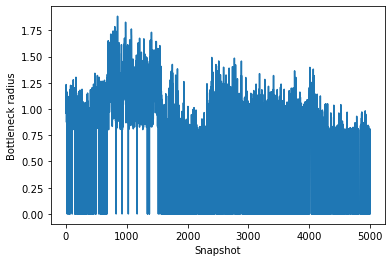

In [307]:
df1 = fen4(df_agf['rep1'])[['Snapshot', 'Bottleneck radius']].reset_index(drop=True)

def fill(df):
    frames = np.arange(1, 5001)
    snapshots = df1[['Snapshot']].values[:,0].tolist()
    missing = []
    for i in frames:
        if i not in snapshots:
            missing.append([i, 0.775])
    df_missing = pd.DataFrame(missing, columns=['Snapshot', 'Bottleneck radius'])
    df_new = df.append(df_missing, ignore_index=True)
    return df_new

sns.lineplot(data=fill(df1), x='Snapshot', y='Bottleneck radius')
#sns.histplot(data=fill(df1)['Bottleneck radius'], binwidth=0.05, kde=True)

In [319]:
def fenfill1(df):
    df_fen = df[df['Fenestration']=='D1-2']
    df_radius = df_fen[['Snapshot', 'Bottleneck radius']].reset_index(drop=True)
    return fill(df_radius)

def fenfill2(df):
    df_fen = df[df['Fenestration']=='D2-3']
    df_radius = df_fen[['Snapshot', 'Bottleneck radius']].reset_index(drop=True)
    return fill(df_radius)

def fenfill3(df):
    df_fen = df[df['Fenestration']=='D3-4']
    df_radius = df_fen[['Snapshot', 'Bottleneck radius']].reset_index(drop=True)
    return fill(df_radius)

def fenfill4(df):
    df_fen = df[df['Fenestration']=='D1-4']
    df_radius = df_fen[['Snapshot', 'Bottleneck radius']].reset_index(drop=True)
    return fill(df_radius)

In [318]:
def moving_avg(df_fenes):
    smoothed = np.convolve(df_fenes['Bottleneck radius'], np.ones(500), 'valid')/500
    smoothed_add = []
    i = 1
    while i < len(df_fenes)+1:
        if i < 251:
            smoothed_add.append(smoothed[0])
        elif i > 250 and i < len(df_fenes)-249:
            smoothed_add.append(smoothed[i-250])
        else: 
            smoothed_add.append(smoothed[-1])
        i += 1
        
    return smoothed_add

def fen1(df):
    return df[df['Fenestration']=='D1-2']

def fen2(df):
    return df[df['Fenestration']=='D2-3']

def fen3(df):
    return df[df['Fenestration']=='D3-4']

def fen4(df):
    return df[df['Fenestration']=='D1-4']

In [323]:
def plot_figrows(df, i):
    sns.lineplot(x=fen1(df['rep1'])['Snapshot'], y=moving_avg(fen1(df['rep1'])), ax=axes[i,0], color='b')
    sns.lineplot(x=fen1(df['rep2'])['Snapshot'], y=moving_avg(fen1(df['rep2'])), ax=axes[i,1], color='b')
    sns.lineplot(x=fen1(df['rep3'])['Snapshot'], y=moving_avg(fen1(df['rep3'])), ax=axes[i,2], color='b')

    sns.lineplot(x=fen2(df['rep1'])['Snapshot'], y=moving_avg(fen2(df['rep1'])), ax=axes[i,0], color='r')
    sns.lineplot(x=fen2(df['rep2'])['Snapshot'], y=moving_avg(fen2(df['rep2'])), ax=axes[i,1], color='r')
    sns.lineplot(x=fen2(df['rep3'])['Snapshot'], y=moving_avg(fen2(df['rep3'])), ax=axes[i,2], color='r')

    sns.lineplot(x=fen3(df['rep1'])['Snapshot'], y=moving_avg(fen3(df['rep1'])), ax=axes[i,0], color='c')
    sns.lineplot(x=fen3(df['rep2'])['Snapshot'], y=moving_avg(fen3(df['rep2'])), ax=axes[i,1], color='c')
    sns.lineplot(x=fen3(df['rep3'])['Snapshot'], y=moving_avg(fen3(df['rep3'])), ax=axes[i,2], color='c')

    sns.lineplot(x=fen4(df['rep1'])['Snapshot'], y=moving_avg(fen4(df['rep1'])), ax=axes[i,0], color='m')
    sns.lineplot(x=fen4(df['rep2'])['Snapshot'], y=moving_avg(fen4(df['rep2'])), ax=axes[i,1], color='m')
    sns.lineplot(x=fen4(df['rep3'])['Snapshot'], y=moving_avg(fen4(df['rep3'])), ax=axes[i,2], color='m')

    sns.histplot(data=pd.concat([fenfill1(df['rep1']), fenfill1(df['rep2']), fenfill1(df['rep3'])]), y='Bottleneck radius', stat='probability', binwidth=0.05, kde='True', ax=axes[i,3], label='D1-2', color='b')
    sns.histplot(data=pd.concat([fenfill2(df['rep1']), fenfill2(df['rep2']), fenfill2(df['rep3'])]), y='Bottleneck radius', stat='probability', binwidth=0.05, kde='True', ax=axes[i,3], label='D2-3', color='r')
    sns.histplot(data=pd.concat([fenfill3(df['rep1']), fenfill3(df['rep2']), fenfill3(df['rep3'])]), y='Bottleneck radius', stat='probability', binwidth=0.05, kde='True', ax=axes[i,3], label='D3-4', color='c')
    sns.histplot(data=pd.concat([fenfill4(df['rep1']), fenfill4(df['rep2']), fenfill4(df['rep3'])]), y='Bottleneck radius', stat='probability', binwidth=0.05, kde='True', ax=axes[i,3], label='D1-4', color='m')
    
    axes[i, 3].axhspan(0.7, 0.8, alpha=0.5, color='grey')

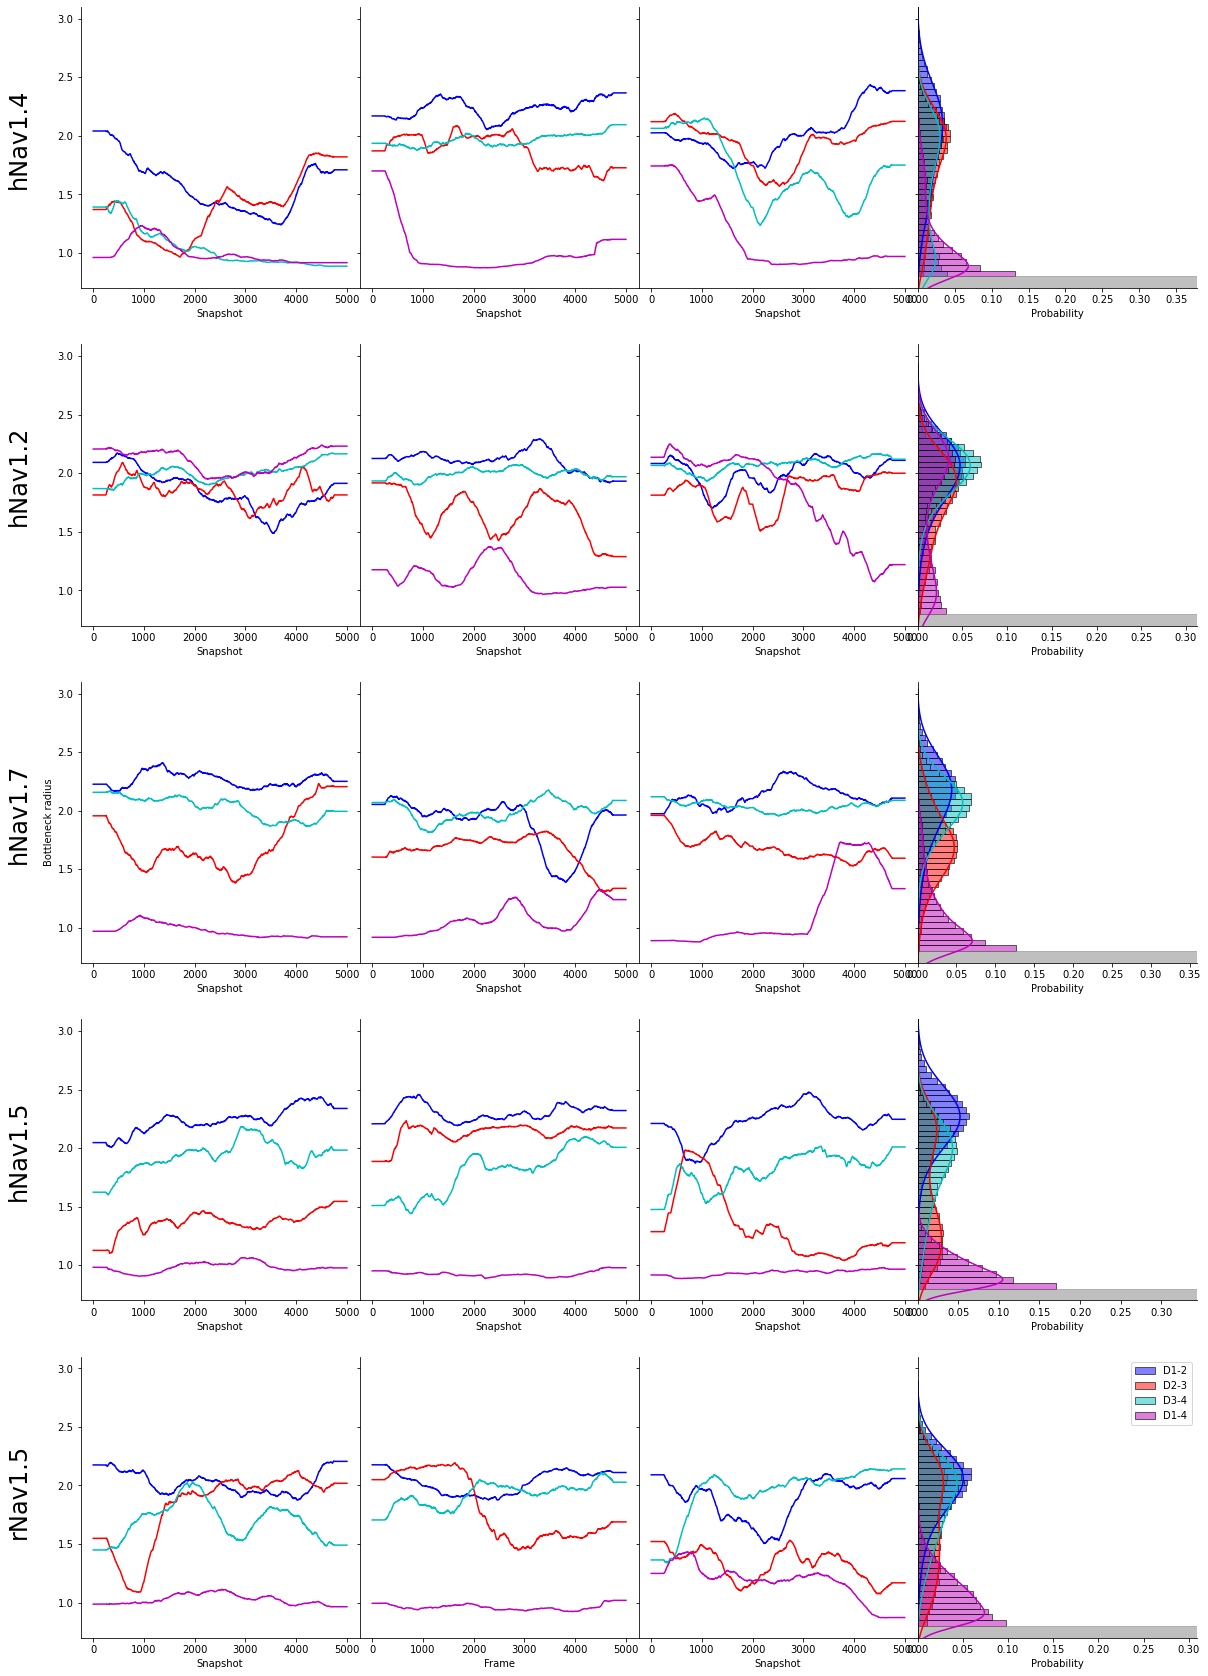

In [324]:
fig, axes = plt.subplots(5, 4, figsize=(20, 30), sharey=True)
plt.subplots_adjust(wspace=0)
sns.despine()
plt.ylim(top=3.1, bottom=0.7)

#i=0
#j=0
#while i<5:
#    while j<4:
#        axes[i,j].set(xlabel=None)
#        j+=1
#    i+=1

axes[2, 0].set_ylabel("Bottleneck radius")
axes[4, 1].set_xlabel("Frame")
axes[4, 3].set_xlabel("Probability")

axes[0, 0].set_title("hNav1.4", fontsize=24, rotation=90, x=-0.22, y=0.35)
axes[1, 0].set_title("hNav1.2", fontsize=24, rotation=90, x=-0.22, y=0.35)
axes[2, 0].set_title("hNav1.7", fontsize=24, rotation=90, x=-0.22, y=0.35)
axes[3, 0].set_title("hNav1.5", fontsize=24, rotation=90, x=-0.22, y=0.35)
axes[4, 0].set_title("rNav1.5", fontsize=24, rotation=90, x=-0.22, y=0.35)

plot_figrows(df_agf, 0)
plot_figrows(df_j8e, 1)
plot_figrows(df_j8g, 2)
plot_figrows(df_uzh, 3)
plot_figrows(df_uzr, 4)

plt.legend()

In [6]:
s6ang_agf1 = pd.read_csv('/home/elaine/elaine_data/vmd_analyses/S6_ANGLE_DAT/agf1_s6_ang.dat', delimiter='\t')
s6ang_agf2 = pd.read_csv('/home/elaine/elaine_data/vmd_analyses/S6_ANGLE_DAT/agf2_s6_ang.dat', delimiter='\t')
s6ang_agf3 = pd.read_csv('/home/elaine/elaine_data/vmd_analyses/S6_ANGLE_DAT/agf3_s6_ang.dat', delimiter='\t')
s6ang_agf1.columns

Index(['frame ', ' DI ', ' DII ', ' DIII ', ' DIV'], dtype='object')

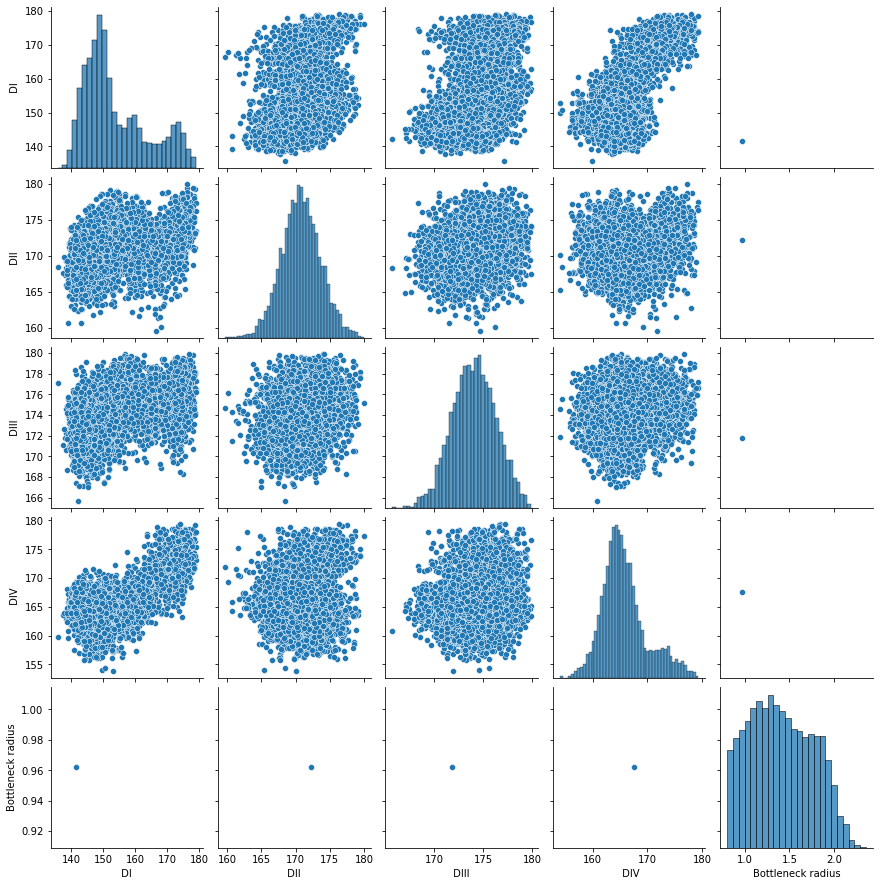

In [31]:
rep1 = pd.concat([s6ang_agf1[[' DI ', ' DII ', ' DIII ', ' DIV']], fen2(df_agf['rep1'])['Bottleneck radius']], axis=1)
#fen1[df_agf['rep2'])['Bottleneck radius']
#fen1[df_agf['rep3'])['Bottleneck radius']
sns.pairplot(data=rep1)

<AxesSubplot:xlabel=' DIV', ylabel='Bottleneck radius'>

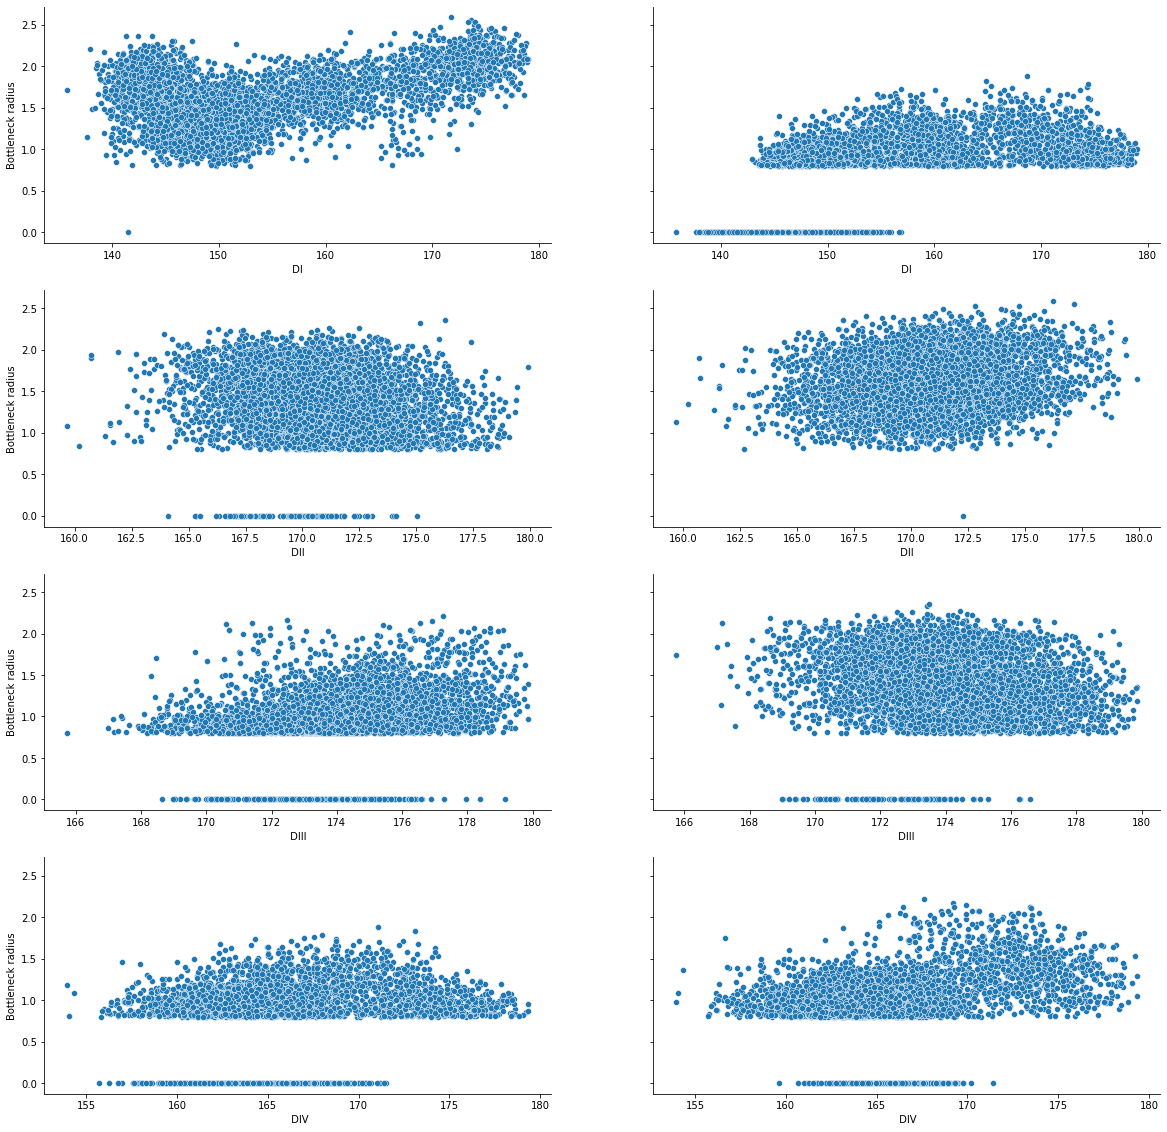

In [310]:
fig, axes = plt.subplots(4, 2, figsize=(20, 20), sharey=True)
sns.despine()

sns.scatterplot(x=s6ang_agf1[' DI '], y=fen1(df_agf['rep1'])['Bottleneck radius'].reset_index(drop=True), ax=axes[0,0])
sns.scatterplot(x=s6ang_agf1[' DII '], y=fen2(df_agf['rep1'])['Bottleneck radius'].reset_index(drop=True), ax=axes[1,0])
sns.scatterplot(x=s6ang_agf1[' DIII '], y=fen3(df_agf['rep1'])['Bottleneck radius'].reset_index(drop=True), ax=axes[2,0])
sns.scatterplot(x=s6ang_agf1[' DIV'], y=fen4(df_agf['rep1'])['Bottleneck radius'].reset_index(drop=True), ax=axes[3,0])

sns.scatterplot(x=s6ang_agf1[' DI '], y=fen4(df_agf['rep1'])['Bottleneck radius'].reset_index(drop=True), ax=axes[0,1])
sns.scatterplot(x=s6ang_agf1[' DII '], y=fen1(df_agf['rep1'])['Bottleneck radius'].reset_index(drop=True), ax=axes[1,1])
sns.scatterplot(x=s6ang_agf1[' DIII '], y=fen2(df_agf['rep1'])['Bottleneck radius'].reset_index(drop=True), ax=axes[2,1])
sns.scatterplot(x=s6ang_agf1[' DIV'], y=fen3(df_agf['rep1'])['Bottleneck radius'].reset_index(drop=True), ax=axes[3,1])

<AxesSubplot:xlabel=' DIV', ylabel='Bottleneck radius'>

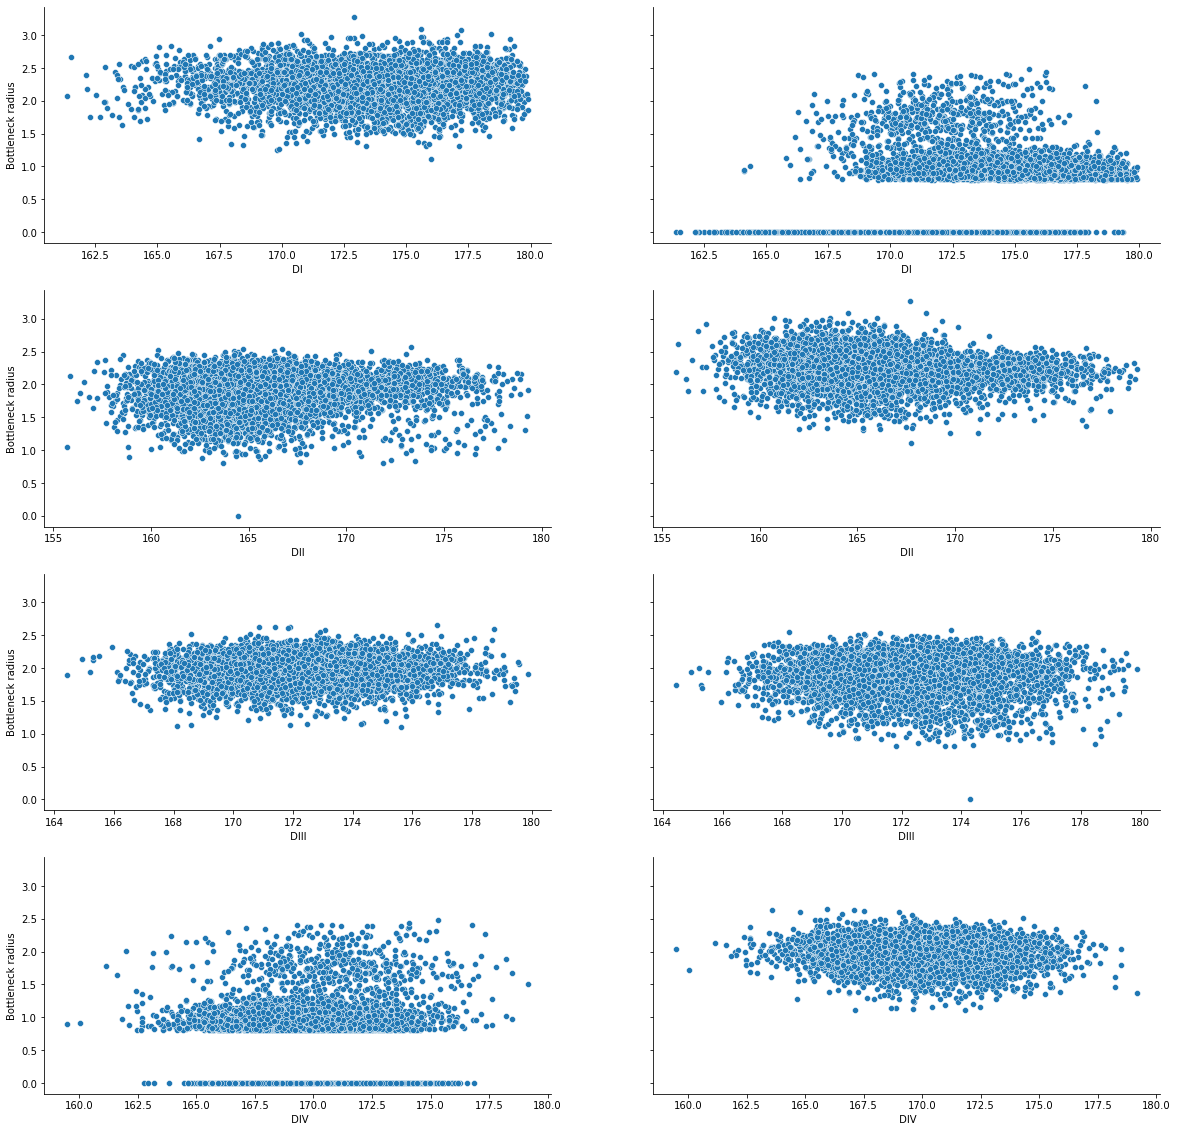

In [311]:
fig, axes = plt.subplots(4, 2, figsize=(20, 20), sharey=True)
sns.despine()

sns.scatterplot(x=s6ang_agf2[' DI '], y=fen1(df_agf['rep2'])['Bottleneck radius'].reset_index(drop=True), ax=axes[0,0])
sns.scatterplot(x=s6ang_agf2[' DII '], y=fen2(df_agf['rep2'])['Bottleneck radius'].reset_index(drop=True), ax=axes[1,0])
sns.scatterplot(x=s6ang_agf2[' DIII '], y=fen3(df_agf['rep2'])['Bottleneck radius'].reset_index(drop=True), ax=axes[2,0])
sns.scatterplot(x=s6ang_agf2[' DIV'], y=fen4(df_agf['rep2'])['Bottleneck radius'].reset_index(drop=True), ax=axes[3,0])

sns.scatterplot(x=s6ang_agf2[' DI '], y=fen4(df_agf['rep2'])['Bottleneck radius'].reset_index(drop=True), ax=axes[0,1])
sns.scatterplot(x=s6ang_agf2[' DII '], y=fen1(df_agf['rep2'])['Bottleneck radius'].reset_index(drop=True), ax=axes[1,1])
sns.scatterplot(x=s6ang_agf2[' DIII '], y=fen2(df_agf['rep2'])['Bottleneck radius'].reset_index(drop=True), ax=axes[2,1])
sns.scatterplot(x=s6ang_agf2[' DIV'], y=fen3(df_agf['rep2'])['Bottleneck radius'].reset_index(drop=True), ax=axes[3,1])

In [52]:
s6ang_uzh1 = pd.read_csv('/home/elaine/elaine_data/vmd_analyses/S6_ANGLE_DAT/uzh1_s6_ang.dat', delimiter='\t')
s6ang_uzh2 = pd.read_csv('/home/elaine/elaine_data/vmd_analyses/S6_ANGLE_DAT/uzh2_s6_ang.dat', delimiter='\t')
s6ang_uzh3 = pd.read_csv('/home/elaine/elaine_data/vmd_analyses/S6_ANGLE_DAT/uzh3_s6_ang.dat', delimiter='\t')
s6ang_uzh1.columns

Index(['frame ', ' DI ', ' DII ', ' DIII ', ' DIV'], dtype='object')

<AxesSubplot:xlabel=' DIV', ylabel='Bottleneck radius'>

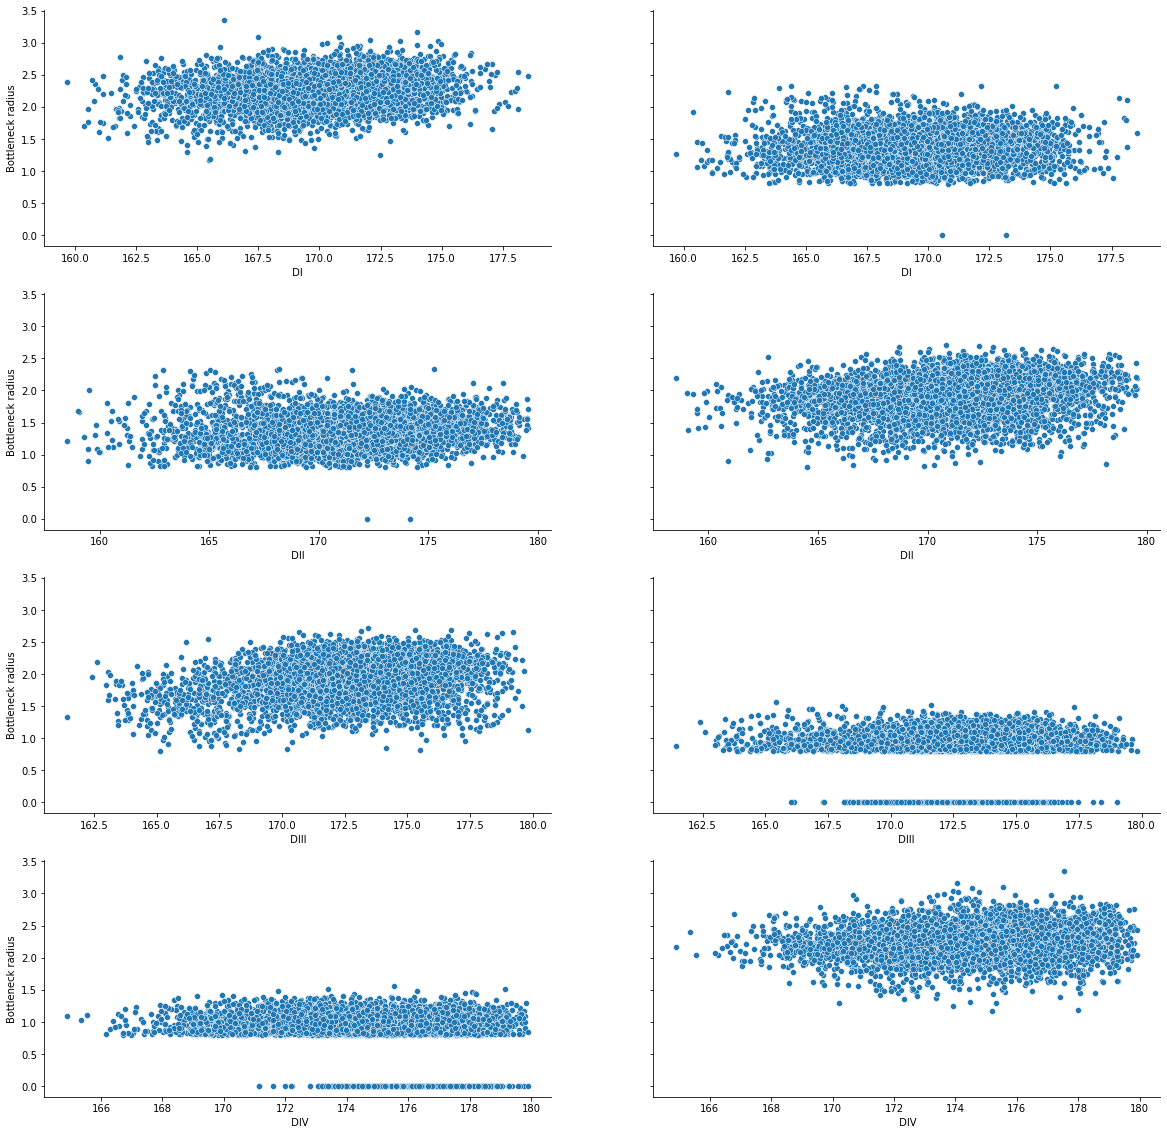

In [312]:
fig, axes = plt.subplots(4, 2, figsize=(20, 20), sharey=True)
sns.despine()

sns.scatterplot(x=s6ang_uzh1[' DI '], y=fen1(df_uzh['rep1'])['Bottleneck radius'].reset_index(drop=True), ax=axes[0,0])
sns.scatterplot(x=s6ang_uzh1[' DII '], y=fen2(df_uzh['rep1'])['Bottleneck radius'].reset_index(drop=True), ax=axes[1,0])
sns.scatterplot(x=s6ang_uzh1[' DIII '], y=fen3(df_uzh['rep1'])['Bottleneck radius'].reset_index(drop=True), ax=axes[2,0])
sns.scatterplot(x=s6ang_uzh1[' DIV'], y=fen4(df_uzh['rep1'])['Bottleneck radius'].reset_index(drop=True), ax=axes[3,0])

sns.scatterplot(x=s6ang_uzh1[' DI '], y=fen2(df_uzh['rep1'])['Bottleneck radius'].reset_index(drop=True), ax=axes[0,1])
sns.scatterplot(x=s6ang_uzh1[' DII '], y=fen3(df_uzh['rep1'])['Bottleneck radius'].reset_index(drop=True), ax=axes[1,1])
sns.scatterplot(x=s6ang_uzh1[' DIII '], y=fen4(df_uzh['rep1'])['Bottleneck radius'].reset_index(drop=True), ax=axes[2,1])
sns.scatterplot(x=s6ang_uzh1[' DIV'], y=fen1(df_uzh['rep1'])['Bottleneck radius'].reset_index(drop=True), ax=axes[3,1])



<AxesSubplot:xlabel=' DIV', ylabel='Bottleneck radius'>

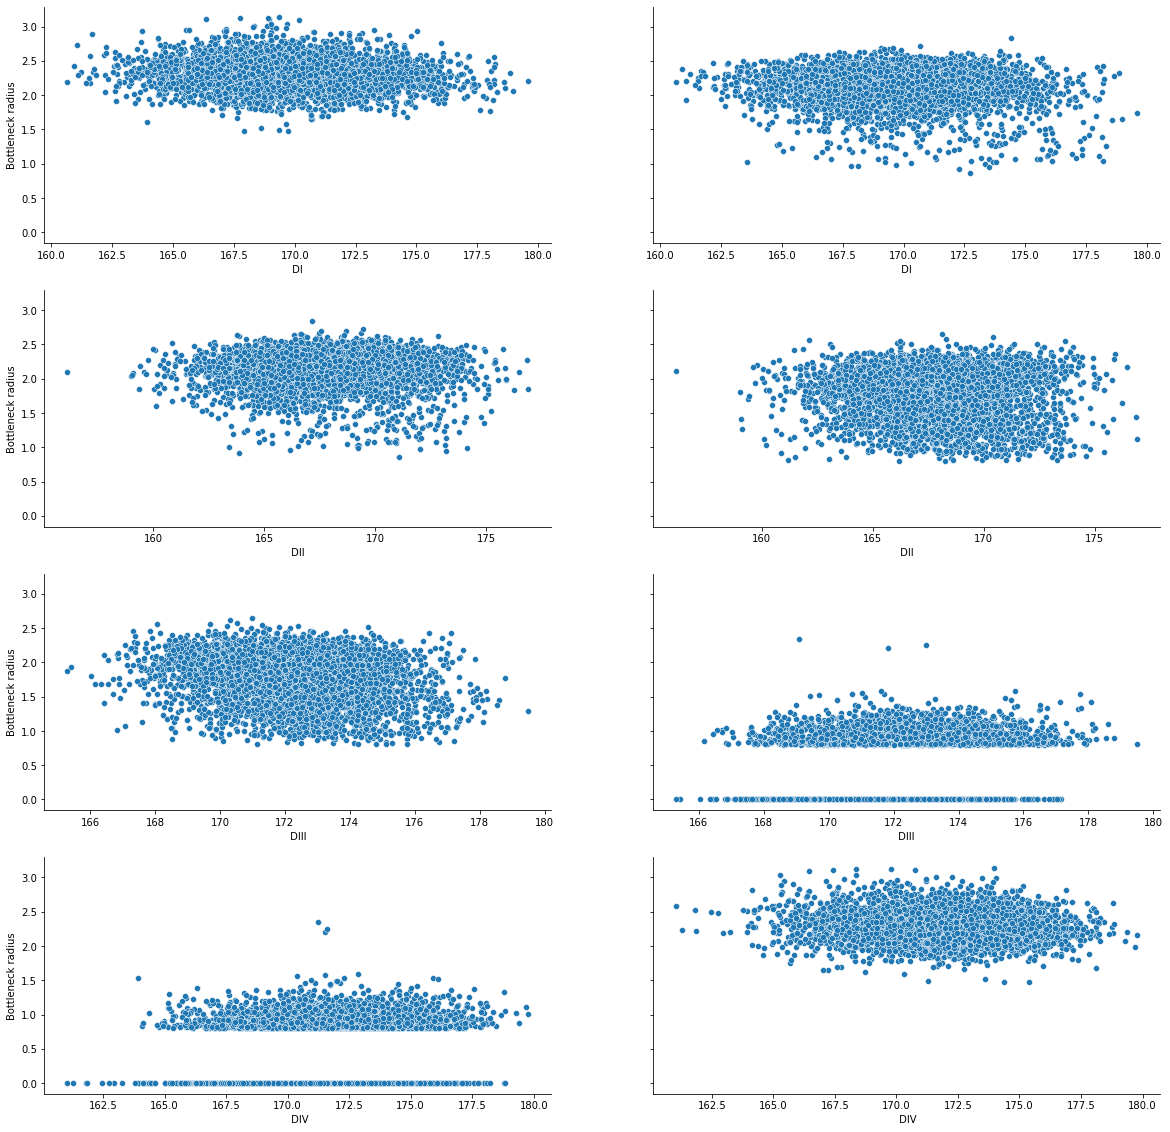

In [313]:

fig, axes = plt.subplots(4, 2, figsize=(20, 20), sharey=True)
sns.despine()

sns.scatterplot(x=s6ang_uzh2[' DI '], y=fen1(df_uzh['rep2'])['Bottleneck radius'].reset_index(drop=True), ax=axes[0,0])
sns.scatterplot(x=s6ang_uzh2[' DII '], y=fen2(df_uzh['rep2'])['Bottleneck radius'].reset_index(drop=True), ax=axes[1,0])
sns.scatterplot(x=s6ang_uzh2[' DIII '], y=fen3(df_uzh['rep2'])['Bottleneck radius'].reset_index(drop=True), ax=axes[2,0])
sns.scatterplot(x=s6ang_uzh2[' DIV'], y=fen4(df_uzh['rep2'])['Bottleneck radius'].reset_index(drop=True), ax=axes[3,0])

sns.scatterplot(x=s6ang_uzh2[' DI '], y=fen2(df_uzh['rep2'])['Bottleneck radius'].reset_index(drop=True), ax=axes[0,1])
sns.scatterplot(x=s6ang_uzh2[' DII '], y=fen3(df_uzh['rep2'])['Bottleneck radius'].reset_index(drop=True), ax=axes[1,1])
sns.scatterplot(x=s6ang_uzh2[' DIII '], y=fen4(df_uzh['rep2'])['Bottleneck radius'].reset_index(drop=True), ax=axes[2,1])
sns.scatterplot(x=s6ang_uzh2[' DIV'], y=fen1(df_uzh['rep2'])['Bottleneck radius'].reset_index(drop=True), ax=axes[3,1])

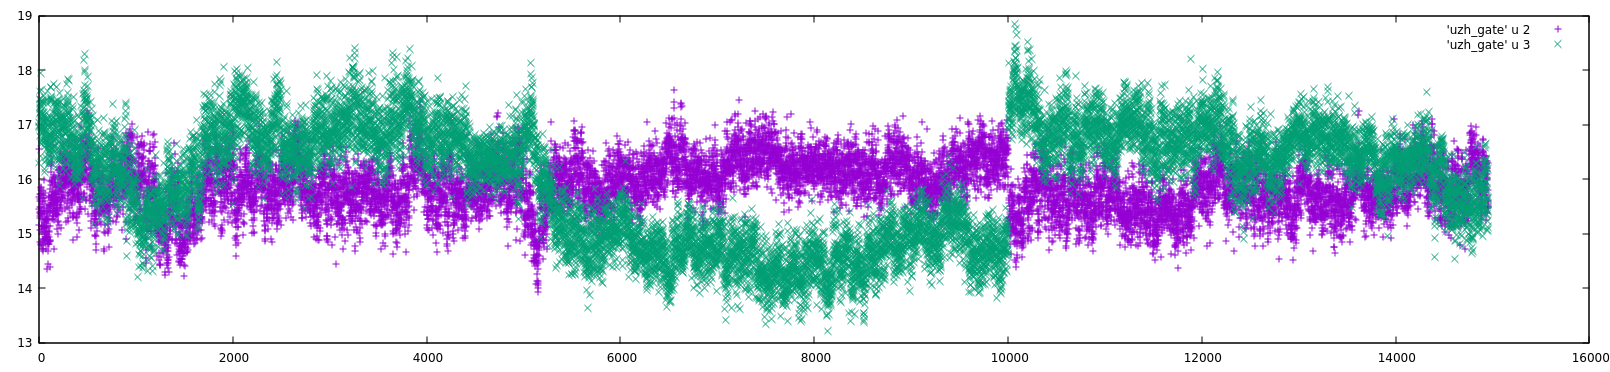
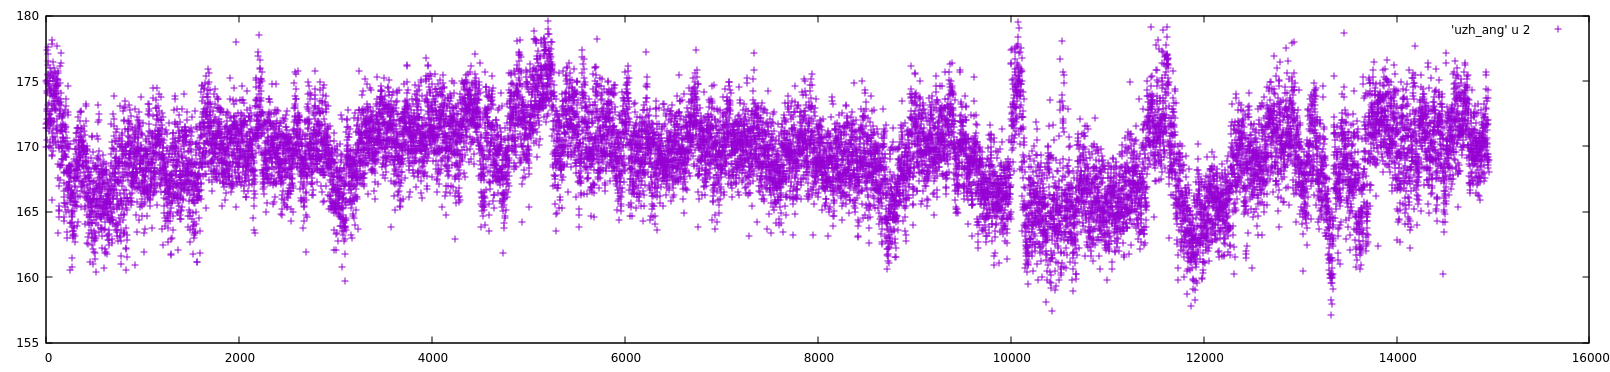
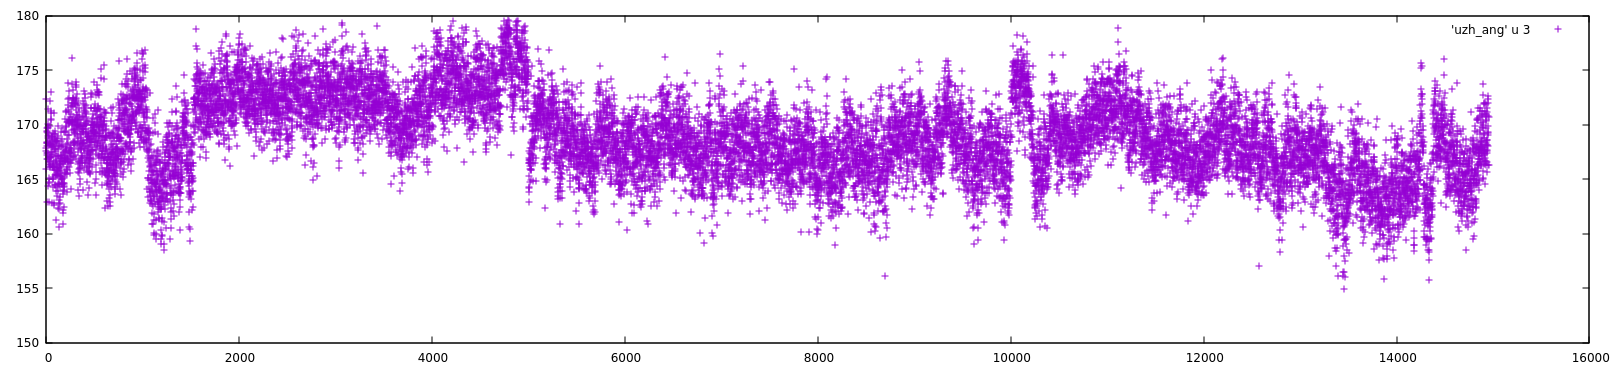
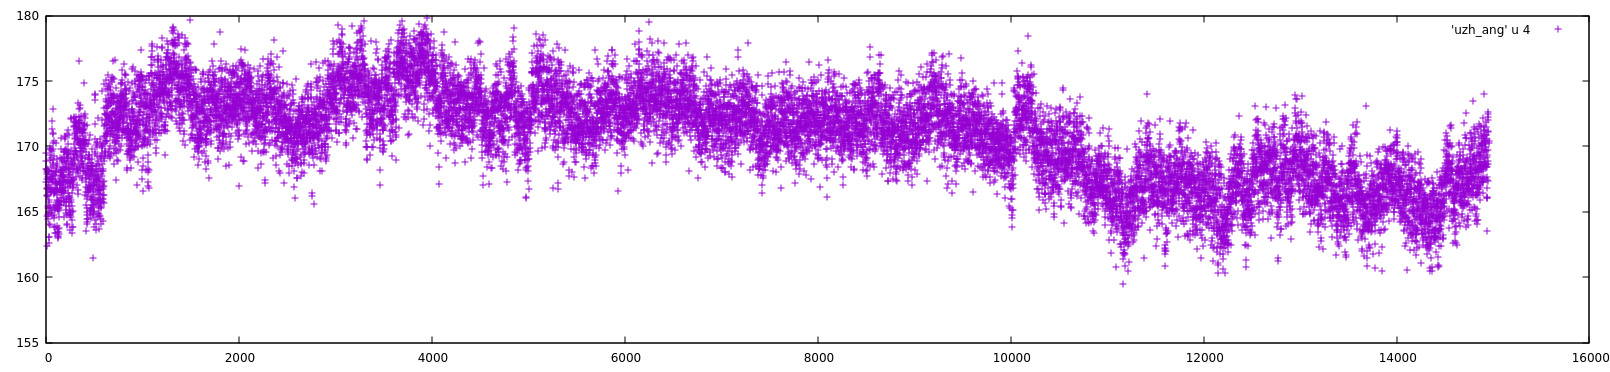
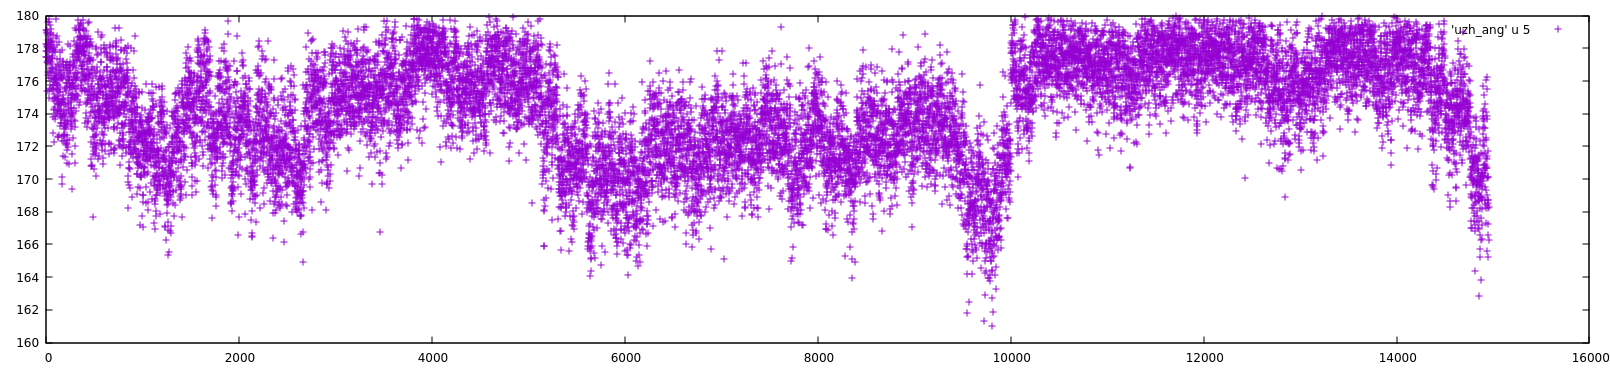